# Сборный проект
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/Users/anastasia/Desktop/games.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/games.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

In [3]:
#приводим к нижнему регистру
df.columns = df.columns.str.lower()


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хорошее решение
</div>


In [4]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Выводы:
1. Первое, что бросается в глаза, это странный формат переменной year_of_release (год релиза);
2. У нас есть пропуски, которые мы не можем никак заменить: год релиза, название игры и жанр; следовательно их необходимо удалить из выборки;
3. Видим много пропусков, которые касаются рейтингов, причем большинство из них(пропусков) пропущены по всем оценкам сразу(критиков, пользователей, от организации).Однако любое заполнение подобных пропусков скорее всего сильно исказит результат, именно поэтому принято решение оставить эти столбцы без изменений;
4. В переменной user_score обнаружено неизвестное значение "tbd"; единсвтенный вариант заменя данной переменной -это заменить ее пропуском или Nan;
5. Также необходимо изменить тип данных в переменной user_score на тип данных float, чтобы была возможность проверить операции

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>

Ты права насчет пропусков, в year_of_release и name и их стоит удалить, потому что пропуски составляют малую долю данных. В оценках и рейтингах лучше не трогать, потому что можем исказить данные. 
    
Насчет tbd и типов данных тоже все верно 👍
    
</div>

In [9]:
#удаляем пропуски в переменных
df.dropna(subset =['year_of_release','name', 'genre'], inplace =True)

In [10]:
#меняем тип переменной 
df['year_of_release'].astype('int')

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

In [11]:
#меняем тип переменной
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Тут можно было использовать метод to_numeric() с параметром errors='coerce', тогда все нечисловые значения сразу заменились на nan и не пришлось бы отдельно их обрабатывать, [документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html)
</div>

In [12]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [14]:
#найдем суммарные продаже во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ

#### Количество выпущенных игр по годам

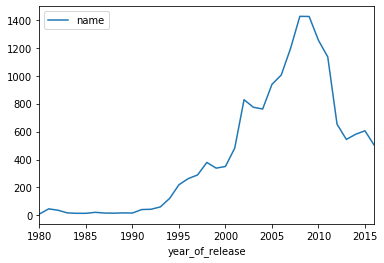

In [15]:
#посмотрим сколько игр выпускалось каждый год
pivot_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
pivot_year.plot()

Сразу можем отметить, что выпуск игр с каждым годом растет в геометрической прогрессии, но так происходит до 2012 года, в последующией 5 лет количество игр сильно уменьшается. Видим очень большой разброс значений; максимальные значения достигаются в 2008 и 2009 годах.  Мы обнаруживвем много низких значений до 1990 года, но пока оставим первоначальную выборку.

####  Продажи по платформам

In [16]:
df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False)

,total_sales
year_of_release,
2008.0,671.50
2009.0,658.82
2007.0,604.75
2010.0,590.13
2006.0,517.71
2011.0,507.58
2005.0,457.82
2004.0,418.68
2002.0,394.97


In [17]:
#выявляем самые прибыльные платформы по количествам продаж
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False).head(7)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14


Мы можем выявить топ-5 платформ по продажам по всему миру: 
1. PS2
2. X360
3. PS3
4. Wii
5. DS

Нет необходимости рассматривать топ 5 платформа до 2000 года, поскольку значения до этого года есть только у одной платформы и в 1985 года(количество продаж там очень мало). Следовательно мы срежем значения от 2000 года.

In [18]:
df = df.query('year_of_release > 1999')

In [19]:
#df_top5 = df.query('platform in ("PS2","X360", "PS3", "Wii", "DS")')
#pivot_top5 = df_top5.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum')
#pivot_top5

In [20]:
#pivot_top5.plot(grid = True, title = 'Распределение продаж по платформа и по годам')

 1. До 2004 года существовала всего лишь одна платформа (PS2);в нашей выборке она занимает лидирующую позицию по суммарным продажам; однако уже к 2012 году мы не наблюдаем этой платформы на рынке; поскольку мы не рассматриваем продажи платформ до 2000 года, то нельзя точно сказать длительность "жизни" данной платформы, но по данной выборке данный показатель составил 12 лет;
 2. С 2004 года начинает функционировать платформа DS; можем отметить, что она достаточно быстро начала разваиться и уже за год сильно подняла свои продажи; ее средняя продолжительность жизни составляет 10 лет;
 3. с 2005 года на рынок выходит платформа X360; развитие данной платформы нельзя нзвать стремительным, было бы лучше описать развитие как постепенное, но мы видим, что в 2016 году данная платформа сильно потеряла и в конечном итоге, вероятнее всего, ушла с рынка в ближашие два года(2017/2018; предполягаем, что средняя продолжительность жизни данной компании составляет 13-14 лет;
 4. С 2006 года на рынке появляются еще две компании (PS3 и Wii); мы можем отметить стремительный рост компании Wii, даже более того, в год старта она собрала достаточно крупное число продаж для начала; развитие PS3 происходило немного медленее, но тем не менее достигло значительного кол-ва продаж; компания Wii лидирует в нашей выборке по количеству продаж(в годовом исчислении в 2009 году); несмотря на быстрый подъем Wii мы видим, что в 2016 году продажи находятся на минимальном уровне и вскоре приведут к банкротству, аналогичная ситуация и со второй компании, но ее показатели на 2016 год, возможно, позволят продержаться на плаву чуть больше; в среднем продолжительность деятельности данных платформ составляет 12-14 лет.

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
10-14 лет — это, конечно, очень оптимистичный прогноз. Может быть стоит дополнительно проанализировать срок жизни. Можно, например, сгурппировать данные по платформам и посчитать количество уникальных значений в признаке year_of_release, чтобы узнать сколько лет на платформу выходили игры
</div>


In [24]:
df.groupby('platform')['year_of_release'].nunique()

platform
3DS      6
DC       5
DS      10
GB       2
GBA      8
GC       7
N64      3
PC      17
PS       4
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
WS       2
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

<div class="alert alert-info">
<h2> Комментарий студента 1</h2>

Сделала разбивку. Получается, что средняя продолжительность жизни платформ составляет 6-8 лет, в лучшем случае это 10 и выше.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Все верно. Можно посчитать количество уникальных значений в year_of_release так:  
`df.groupby('platform')['year_of_release'].nunique()`

</div>


Теперь перейдем к актуальному периоду. Нам кажется, что наиболее предпочтительным будет период с 2006 по 2016 года, поскольку именно с 2006 года начинают функционировать все топ-5 платформ(11 летнего периода должно быть достаточно для построения прогноза). 

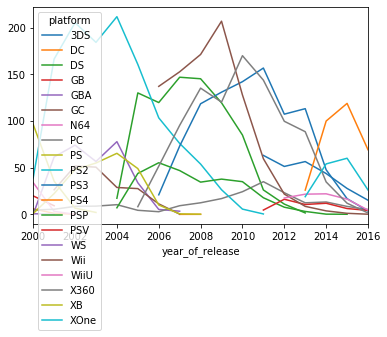

In [25]:
df.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Нужно изменить актуальный период.

Если мы будем рассматривать данные с 2006 по 2016 гг, то захватим период смены тренда на рынке видеоигр, плюс мы видим по графику выше, что многие платформы за это время успели потерять свою популярность.

Еще подумай, пожалуйста, о жизненном цикле продукта, через сколько лет после релиза у платформ наступает пик продаж? Будет здорово, если в актуальный период не попадут старые тренды, которые могут негативно повлиять на наши рекомендации.

___
    
> ... поскольку именно с 2006 года начинают функционировать все топ-5 платформ ...
    
Там почти всем платформам на смену уже пришло новое поколение PS3 -> PS4, X360 -> XOne, Wii -> WiiU
    
Высокие продажи по устаревшим платформам наоборот будут портить наш прогноз.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

согласна с замечанием по поводу актуального периода. Почему-то рассматривала только относительно топ 5, а не относительно всех платформа. Пик продаж у каждой платформы наступает по-разному, но приблительно я бы в среднем округлила до 2-3-х лет после релиза. В качестве актулаьного периода сейчас я бы выбрала 2011-2016 года. 
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что уменьшила актуальный период 👍

</div>

In [26]:
df = df.query('year_of_release > 2011')
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


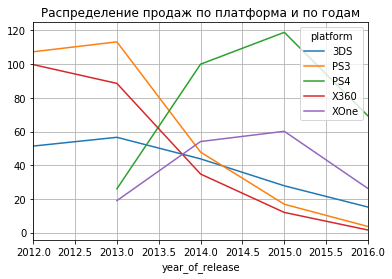

In [27]:
df_top5 = df.query('platform in ("PS4","X360", "PS3", "XOne", "3DS")')
pivot_top5 = df_top5.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum')
pivot_top5.plot(grid = True, title = 'Распределение продаж по платформа и по годам')

Мы можем выявить топ-5 платформ по продажам по всему миру: 
1. PS4
2. X360
3. PS3
4. XOne
5. 3DS

1. В актуальный период мы наблюдаем нисходящий тренд по платформам, которые уже есть на рынке и восходящий тренд у новых платформ;
2. Компания PS4 занимают лидирубщую позицию по общим продажам; она появилась только в 2013 годуи за 2 года уже смогла получить продажи больше всех за 6 летний период; однако после достижения пика, продажи платформы стремительно пошли на убыль;
3. Второе мето занимает компания PS3, чьи продажи постепенно снижаются и в 2016 году находятся практически около нуля;
4. Третье место занимает компания X360; она достаточно давно находится на рынке, но в данный период находится в увядающем состоянии;
5. XOne аналогично первой платформе начала функционировать в 2013 году, но получила значительно меньшую популярность; пик популярности также приходится на 2015 год, но ее показатели практически в два раза ниже чем PS4;
6. Компания 3DS демонстрирует аналогичную всем уже существовашим компанию нисходящую тенденцию.

In [28]:
pivot_top5 = df_top5.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum')
pivot_top5

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2012.0,51.36,107.36,NaN,99.74,NaN
2013.0,56.57,113.25,25.99,88.58,18.96
2014.0,43.76,47.76,100.00,34.74,54.07
2015.0,27.78,16.82,118.90,11.96,60.14
2016.0,15.14,3.60,69.25,1.52,26.15


#### Корреляция между продажами и оценками пользователей и критиков на примере самой прибыльной платформы PS4

In [29]:
df_PS2 = df.query('platform == "PS4"')

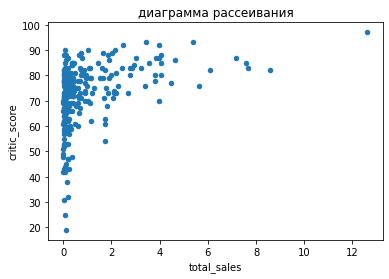

In [30]:
df_PS2.plot(kind = 'scatter', x = 'total_sales', y = 'critic_score', title = 'диаграмма рассеивания')

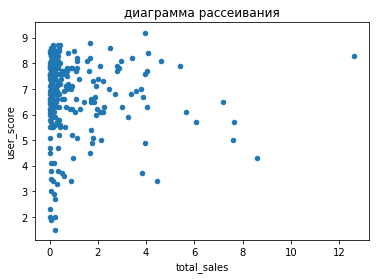

In [31]:
df_PS2.plot(kind = 'scatter', x = 'total_sales', y = 'user_score', title = 'диаграмма рассеивания')

In [32]:
print(df_PS2['total_sales'].corr(df['critic_score']))

0.406567902061781


In [33]:
print(df_PS2['total_sales'].corr(df['user_score']))

-0.031957110204556424


Явной зависимости мы не обнаруживаем, однако она наблюдается между оценкой критиков и общими продажамт: связь положительная средней силы. Что касается оценки пользователей, то связь так же существует, но она достаточно слабая.

<div class="alert alert-info">
<h2> Комментарий студента 1</h2>
    
Наблюдаем слабую положительную связь между продажами самой прибыльной компании и оценками критиков, в тоже время может заявить, чо связи между оценками пользователей и продажами не существует. Таким образом, вероятно при выборе игр люди могут ориентироваться на оценки критиков. 
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, ты правильно определила зависимость продаж от оценок. Только если мы видим коэффициент корреляции в интервале [-0.25, 0.25], это скорее говорит о том, что связи нет.
</div>

#### Ящик с усами

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
У нас тут как-то перемешались корреляция и диаграмма размаха по продажам. Поправь, пожалуйста, структуру проекта
</div>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


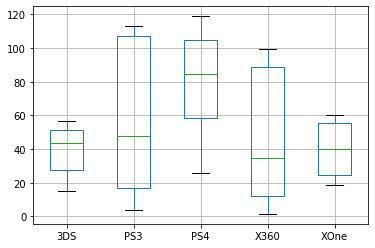

In [34]:
pivot_top5.boxplot()

Видим, что в преставленной выборке все значения входят в межквартильный размах, что говорит об отсутствии выбросов. Данные по платформам 3DS, PS4 скошены влево: медиана больше среднего; в то время как по платформам PS3 и X360 скошены вправо, распределение значений по платформе XOne близко к нормальному.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что рассмотрела суммарные годовые продажи по платформам
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Но давай еще рассмотрит продажи по всем играм за актуальный период без группировки по годам. Это позволит понять, у каких платформ игры обычно продаются большим тиражом. Учти, что на этом графике будет много выбросов, можно о них сказать пару слов в выводе.
    
Еще будет здорово, если ты добавишь еще один график, но с использованием метода .ylim() библиотеки matplotlib, с помощью которого можно ограничить значения по оси Y. Это позволит нам рассмотреть значения квартилей.
    
[Документация ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)
    

</div>


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 4)

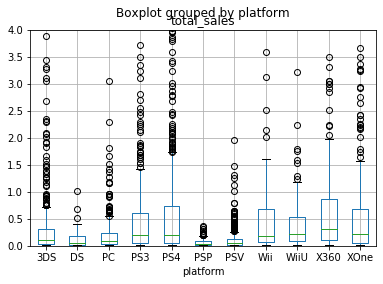

In [40]:
df.boxplot(column = 'total_sales',by = 'platform')
plt.ylim(0, 4)

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Если честно, не совсем поняла, что имеешь ввиду под последним комментарием. Вероятнее всего абсолютно не то, что я нарисовала(. Можешь как-то иначе объяснить?)
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера 2</b>
    
Сначала ты нарисовала боксплот по годовым продажам игр в разрезе платформ, и я попросил построить боксплот без группировки данных по годам. 
    
Нужно построить боксплот по таблице df в разрезе платформ, это можно сделать с помощью параметра by метода .boxplot()
    
`games2.boxplot(column=...,by=...)`
    
[Документация boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)
    
На полученном графике будет много выбросов, из-за которых квартили и усы будут плохо видны. Поэтому можно добавить второй точно такой же график, но с использованием метода .ylim() библиотеки matplotlib, с помощью которого можно ограничить диапазон значений по оси Y. Это позволит нам рассмотреть значения квартилей.
    
[Документация ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)    
</div>


<div class="alert alert-info">
<h2> Комментарий студента 2</h2>

Все, теперь поняла). Мы видим, что продажи достаточно маленькие по всем платформам; данные скошены вправо; действительно очень много выбросов,можно отметить то, что больше всего выбросов приходится именно на самые популярные платформы. Это может объясняться тем, что некоторые из них находятся на пике популярности, ввиду этого и идет сверх большие продажи.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 3</b>

Все верно

</div>


#### Корреляция между продажами и оценками пользователей и критиков по топ 5 платформам

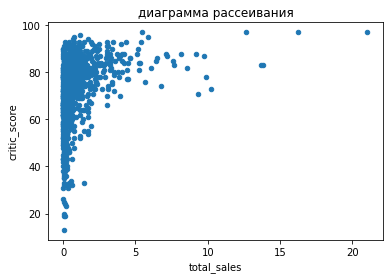

In [41]:
df.plot(kind = 'scatter', x = 'total_sales', y = 'critic_score', title = 'диаграмма рассеивания')

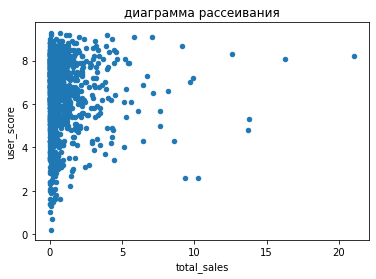

In [42]:
df.plot(kind = 'scatter', x = 'total_sales', y = 'user_score', title = 'диаграмма рассеивания')

In [43]:
print(df['total_sales'].corr(df['critic_score']))

0.308196745920778


In [44]:
print(df['total_sales'].corr(df['user_score']))

0.004428817675493266


Исходя из результатов диаграмм рассеивания и коэффициентов корреляции мы можем утверждать, что связь между оценками критиков/пользователей и продажами игр достаточно слабая. Таким образом, можно сказать, что люди, при покупке игр, вероятнее всего редко заостряют свое внимание на оценки. 

При сравнении результатов по топ 5 платформам и самой прибыльной, можно заявить, что связь положительна, но в рамках 5 платформ она достаточно слабая, чтобы говорить о существенной корреляции между переменными.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Аналогично с самой прибыльной платформой, топ-5 платформ демонстрируют положительную слабую взяимосвязь между продажами и оцек=нкой критиков и отсутствие связи между продажами и оценкой пользователей.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>
    
👍
</div>


#### Распределение игр по жанрам

In [45]:
pivot_genre = df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
pivot_genre.sort_values(by = 'total_sales',ascending = False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Самым популярным по количеству продаж жанром является боевик; такая лидирующая позиция жанра достаточно очевидна, поскольку современный человек подвержен стрессу и именно боевики позволяют выплеснуть эту накопившуюся агрессию в сражениях, однако не всегда этого достаточно ( именно поэтому шутеры на втором месте по продажам), зачастую хочется каких-то дополнительных логических задач, которые представлены в экшене. Предпоследнее место по продажам занимают стратегические игры: вероятно, объяснение может быть в том, что в играх людям больше всего хочется отвлечься от реальности и расслабиться, в то время как в стратегиях необходимо предпринять много мыслительных действий, что может отпугивать большинство потенциальных покупателей. И самое последнее место принадлежит пазлам, вероятнее всего это достаточно скучные игры, поэтому люди не видят смысла платить за них деньги.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что рассмотрела суммарные продажи игр по жанрам.
</div>



<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
    
Давай еще посмотрим на количество игр в каждом жанре. Если количество игр будет сильно различаться, предлагаю посчитать медианные продажи игр по жанрам, чтобы понять, какой жанр обычно продается лучше.
</div>

In [46]:
df.pivot_table(index = 'genre', values = 'name', aggfunc = 'count')

,name
genre,
Action,1031
Adventure,302
Fighting,109
Misc,192
Platform,85
Puzzle,28
Racing,115
Role-Playing,370
Shooter,235


In [47]:
df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales',ascending = False)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


<div class="alert alert-info">
<h2> Комментарий студента</h2>

значения достаточно сильно разнились по количеству игр в каждом жанре, поэтому взяла медиану. Получается, что лучше всего продаются шутеры, спорт и платформеры. Хуже всего пазлы и приключения. 
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Все верно, молодец, что дополнила исследование

</div>

## Портреты пользователей каждого региона

#### Портрет пользователя из Северной Америки

In [48]:
#Самые популярные платформы
df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [49]:
#Самые популярные жанры 
df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median').sort_values(by = 'na_sales', ascending = False).head()

,na_sales
genre,
Shooter,0.20
Platform,0.09
Sports,0.08
Fighting,0.05
Racing,0.04


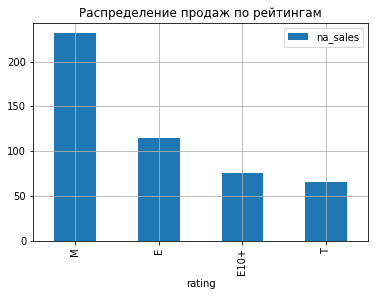

In [50]:
#Влияет ли рейтинг ESRB на продажи в регионе?
df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).plot(kind = 'bar', title = 'Распределение продаж по рейтингам', grid =True)


<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
В признаке rating у нас 40% пропусков, мы могли бы их заполнить значением-заглушкой, чтобы посмотреть, как они распределятся между регионами 
</div>

Добавим описание категорий для удобства:
1. E - для всех;
2. M - для взрослых (18+);
3. Т - подростки (13+);
4. Е10+ -от 10 лет и старше;
5. ЕС - для детей младшего возраст (3+);
6. RP - рейтинг ожидается

Типичный портрет пользователя из Северной Америки:
1. Распределение топ 5 платформ не отличается от топ 5 самых прибыльных платформ по всему миру; лидирующую позицию занимает платформа X360;
2. Предпочтения так же не отличаются от всего мира; лидирующие позиция по-прежнему остаются за шутерами и платформерами;
3. Наблюдаем, что есть зависимость между возрастным рейтингом и продажами:наибольшие продажи приходятся именно на  игры для взрослых. Также популярны игры без возрастных ограничений.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
В целом все верно
</div>

#### Портрет пользователя из Европы

In [51]:
#Самые популярные платформы
df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [52]:
#Самые популярные жанры 
df_eu = df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median').sort_values(by = 'eu_sales', ascending = False).head()
df_eu

,eu_sales
genre,
Shooter,0.17
Racing,0.09
Platform,0.08
Sports,0.05
Simulation,0.03


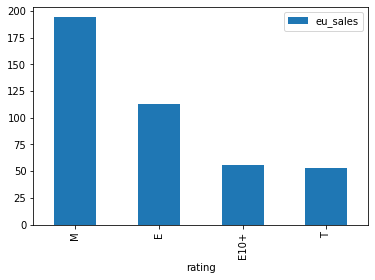

In [53]:
#Влияет ли рейтинг ESRB на продажи в регионе?
df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending =False).plot(kind = 'bar')

Портрет пользователя из Европы:
1. В топ 5 популярных платформ здесь входят аналогичные топ 5 прибыльных платформ по миру;
2. На первом месте по полуярности - шутеры, однако пятерку самых популярных жанров замыкают симуляторы;
3. Аналогично с Северной Америкой мы выявляем взаимосвязь возрастных  ограничений и количеством продаж: наибольшие продажи приходятся именно на категорию для взрослых;
4. Последним пунктом отметим, что игровая культура Европы и Северной Америки схожа.

#### Портрет пользователя из Японии

In [54]:
#Самые популярные платформы
df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [55]:
#Самые популярные жанры 
df_jp = df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median').sort_values(by = 'jp_sales', ascending = False).head()
df_jp

,jp_sales
genre,
Role-Playing,0.06
Fighting,0.03
Misc,0.02
Action,0.01
Adventure,0.01


In [56]:
#Самые популярные жанры 
df_jp = df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
df_jp

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


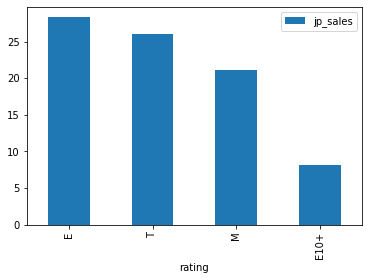

In [57]:
#Влияет ли рейтинг ESRB на продажи в регионе?
df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending =False).plot(kind = 'bar')

Портрет пользователя из Японии:
1. Первое, что бросается в глаза - суммарные продажи(даже без подсчета суммы) явно ниже чем в СА и Европе, что может говорить о том, что японцы меньше покупают компьютерыне игры, что очень настораживает, поскольку Япония лидирует по доходности в индустрии компьютерных игр;
2. Самый популярный жанр здесь отнюдь не шутеры, а ролевые игры; топ 5 завершают игры, связанные с борьбой;
3. Основные продажи приходятся на игры без возрастных ограничений, однако второе место занимают не игры для взрослых, а игры для подростков, что вероятно может указывать на то, что компьютерные игры актуальны среди подростков в Японии

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, ты хорошо справилась с составлением портретов пользователей
</div>

## Проверка гипотез

#### Пользовательские рейтинги платформ

1. H0: Средние пользовательские рейтинги платформ Xbox One(XOne) и PC одинаковые
2. H1: Средние пользовательские рейтинги платформ Xbox One(XOne) и PC разные

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
К вопросу об актуальном периоде. Тут мы проверяем гипотезу про XOne, получается это важная для нас платформа, но она нигде раньше не упоминалась в исследовании
</div>

Для проверки гипотез будет применен критерий t-Стъюдента

Я ниже провела тестирование гипотезы, но совсем не понимаю, почему выдает ошибку при использовании индексов?

In [58]:
# df_hyp1 = df.query('platform in ("XOne", "PC")')
# df_hyp1 = df.pivot_table(index = 'platform', values = 'user_score', aggfunc = 'mean')
# alpha = 0.05
# results = st.ttest_ind(df_hyp1[4], df_hyp1[15])
# if results.pvalue < alpha:
#    print('Отвергаем нулевую гипотезу')
# else:
#   print('Невозможно отвергнуть нулевую гипотезу')

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
> не понимаю, почему выдает ошибку при использовании индексов?
    
Потому что ты используешь в качестве индексов названия платформ. Можно было сбросить индексы через reset_index или обращаться к значениям с помощью названия платформ. Но в любом случае, строка df_hyp1[4] не стала бы работать, потому что df_hyp1 - это pd.DataFrame. Чтобы обращаться по номеру можно привести к массиву:  
`df_hyp1.user_score.to_list()[4]`  
либо использовать срез данных:  
`df_hyp1.reset_index()[4:5]`
</div>



<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Но тут сама идея была не очень, потому что в st.ttest_ind нужно передавать выборки, а не средние значения выборок. Может быть стоит еще раз посмотреть теорию из тренажера
</div>


<div class="alert alert-info">
<h2> Комментарий студента</h2>

Все поняла. Спасибо за объяснение.
</div>


In [59]:
df_hyp1_PC = df.query('platform == "PC"')
df_hyp1_Xbox = df.query('platform == "XOne"')

In [60]:
alpha = 0.05
results = st.ttest_ind(df_hyp1_PC['user_score'], df_hyp1_Xbox['user_score'], nan_policy = 'omit')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу', 'при p-value равному {}'.format(results.pvalue))
else:
    print('Невозможно отвергнуть нулевую гипотезу', 'при p-value равному {}'.format(results.pvalue))

Невозможно отвергнуть нулевую гипотезу при p-value равному 0.5535080500642724


Вывод: результаты тестирования говорят, что с 95% вероятностью средние пользовательские рейтинги на платформе Xbox One и PC одинаковые.

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно сформулировала гипотезу и правильно выбрала метод проверки, но по факту ты не проверила гипотезу, потому что сейчас у тебя pvalue = nan. Это случилось потому, что в df_hyp1_PC['user_score'] и df_hyp1_Xbox['user_score'] есть пропуски. Нужно либо удалить их, либо указать соответствующий параметр в st.ttest_ind, чтобы пропущенные значения игнорировались.
    
Нужный параметр можешь найти в [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). И выводи, пожалуйста, всегда значение pvalue на экран
    
То же самое касается проверки второй гипотезы
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Спасибо! Даже не подумала, что пропуски могут как-то повлиять на проверку гипотез, но и не проверила p-value.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что поправила код

</div>

#### Пользовательские рейтинги жанров 

1. H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
2. H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [61]:
df_hyp2_Ac = df.query('genre =="Action"')
df_hyp2_Sp = df.query('genre =="Sports"')

In [62]:
alpha = 0.05
results = st.ttest_ind(df_hyp2_Ac['user_score'],df_hyp2_Sp['user_score'], nan_policy = 'omit')
if results.pvalue < alpha:
    print('Отвергает нулевую гипотезу', 'при p-value равному {}'.format(results.pvalue))
else:
    print('Невозможно отвергнуть нулевую гипотезу', 'при p-value равному {}'.format(results.pvalue))

Отвергает нулевую гипотезу при p-value равному 3.716308946093586e-26


Вывод: с вероятностью 95% средние пользовательские рейтинги по жанру экшен и спорт разные.

## Общий вывод

1. Количество продаж игр растет с каждым годом до 2012 года, в последующие года продажи постепенно падают;
2. В качестве актуального периода был выбран период с 2011 по 2016 года;
3. Самыми прибыльными платформами по всему миру являются: PS3, X360, PS4,XOne,3DS; средняя продолжительнось жизни платформ в среднем 6-8 лет; связь между оценками критиков и продажами (на 5 платформах) положительна, но достаточно слабая ; связи между оценками пользователей и продажами не обнаружено, поэтому можем предположить, что люди при выборе игр опираются на оценки критиков, но никак не на оценки других пользователей, что веротянее всего логично, поскольку пользователи как правило трактуют отзывы исходя из личных предпочтений без объективных оценок;
4. Самые популярные игровые  жанры: шутеры, спорт и шплатформеры; самые не прибыльные жанры -пазлы и приключения;
5. Типичный портрет покупателя из Северной Америки аналогичен портрету усредненного покупателя по всему миру; по возрастной категории - люди в больше степени отдают предпочтения играм 18+, на втором месте - игры без возрастных ограничений;
6. Типичный портрет покупателя из Европы схож с портретом из Северной Америки, исключение составляет, что в топ 5 жанров входят симуляторы;
7. Типичный портрет японца сильно отличается от остальных регионов; сразу отмечается, что продажи игр здесь значительно ниже по сравнению с остальными регионам; самым популярным жанром являются ролевые игры; самые популярные игры здесь  без возрастных ограничений, а на втором месте - игры для подростков;
8. Пользовательсткие рейтинги на платформах Xbox One и PC в среднем не отличаются;
9. Пользовательские рейтинги по жанрам экшн и спорт отличаются в среднем.


Критерии потенциально-популярного продукта: 
1. возрастная категория продукта 18+ или без возрастных ограничений;
2. принадлежит к жанру шутеры, сплатформеры, ролевые игры или гонки;
3. платформы : PS4 или X360;
4. также есть намек

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хороший вывод
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Спасибо за твою работу! Ты хорошо справилась с подготовкой и анализом данных, у тебя получились отличные графики и логичные выводы

Осталось немного доработать проект:

- изменить актуальный период
- добавить еще боксплот без группировки данных по годам
- посчитать медианные продажи по жанрам
- поправить данные для проверки гипотез

Обрати внимание, что эти изменения могут сильно повлиять на данные. Проверь, пожалуйста, все комментарии и выводы перед отправкой проекта.

Жду твои исправления:)

</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Осталось доделать совсем чуть-чуть:
    
- построить боксплот по данным без группировки по годам
    
Жду твои исправления

</div>

<div class="alert alert-info">
<h2> Комментарий студента 2</h2>

Спасибо за ревью. Все было понятно и супер полезно)
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Спасибо, что учла мои комментарии. Надеюсь, эта работа была полезна для тебя. Я принимаю твой проект и желаю удачи в прохождении курса!

</div>
